In [49]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor


import math
from sklearn.metrics import r2_score, mean_squared_error

In [50]:
!pip show scikit-learn


Name: scikit-learn
Version: 1.2.0
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: c:\users\ulas\anaconda3\lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: scikit-learn-intelex


In [51]:
cars_data=pd.read_csv('carData.csv')

In [52]:
cars_data.iloc[171]

Make                    Mercedes-Benz
Model                       300-Class
Year                             1991
Engine Fuel Type     regular unleaded
Engine HP                       177.0
Engine Cylinders                  6.0
Transmission Type           AUTOMATIC
Driven_Wheels        rear wheel drive
Number of Doors                   4.0
Market Category                Luxury
Vehicle Size                    Large
Vehicle Style                   Sedan
highway MPG                        19
city mpg                           15
Popularity                        617
MSRP                             2124
Name: 171, dtype: object

# Data Cleaning



In [53]:
cars_data.columns = cars_data.columns.str.lower().str.replace(" ", "_")
cars_data.rename(columns = {'engine_fuel_type' : 'fuel_type', 'engine_hp' : 'hp', 'engine_cylinders' : 'cylinders', 'transmission_type' : 'transmission', 'driven_wheels' : 'drive', 'number_of_doors' : 'doors', 'market_category' : 'market', 'vehicle_size' : 'size', 'vehicle_style' : 'style', 'msrp' : 'price'}, inplace = True)

In [54]:
cars_data.iloc[480]

make                      Toyota
model                    4Runner
year                        2014
fuel_type       regular unleaded
hp                         270.0
cylinders                    6.0
transmission           AUTOMATIC
drive           rear wheel drive
doors                        4.0
market                       NaN
size                     Midsize
style                    4dr SUV
highway_mpg                   23
city_mpg                      17
popularity                  2031
price                      35740
Name: 480, dtype: object

In [55]:
print('Number of duplicates are : ', cars_data.duplicated().sum())

Number of duplicates are :  715


In [56]:
cars_data = cars_data.drop_duplicates()


# Missing Values

In [57]:
print('Number of missing values in each columns are below : ')
print(cars_data.isnull().sum())



Number of missing values in each columns are below : 
make               0
model              0
year               0
fuel_type          3
hp                69
cylinders         30
transmission       0
drive              0
doors              6
market          3376
size               0
style              0
highway_mpg        0
city_mpg           0
popularity         0
price              0
dtype: int64


In [58]:
#Let's drop the market column as it contains too much of the null values and 
#also this feature doesn't have high importance regarding target feature which is price



In [59]:
cars_data.drop('market', axis = 1, inplace = True)


In [60]:
null_values = cars_data[cars_data.isnull().any(axis = 1)]
null_values

,make,model,year,fuel_type,hp,cylinders,transmission,drive,doors,size,style,highway_mpg,city_mpg,popularity,price
539,FIAT,500e,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Compact,2dr Hatchback,108,122,819,31800
540,FIAT,500e,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Compact,2dr Hatchback,103,121,819,31800
541,FIAT,500e,2017,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Compact,2dr Hatchback,103,121,819,31800
1983,Chevrolet,Bolt EV,2017,electric,200.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,110,128,1385,40905
1984,Chevrolet,Bolt EV,2017,electric,200.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,110,128,1385,36620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9853,Kia,Soul EV,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Compact,Wagon,92,120,1720,31950
9854,Kia,Soul EV,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Compact,Wagon,92,120,1720,35950
11321,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,25,17,481,17199
11322,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,25,17,481,20199


In [61]:
print(cars_data.isnull().sum())


make             0
model            0
year             0
fuel_type        3
hp              69
cylinders       30
transmission     0
drive            0
doors            6
size             0
style            0
highway_mpg      0
city_mpg         0
popularity       0
price            0
dtype: int64


In [62]:
cars_data['fuel_type'] = cars_data['fuel_type'].fillna(method='ffill')

In [63]:
cars_data['hp'] = cars_data['hp'].fillna(method='ffill')

In [64]:
cars_data['cylinders'] = cars_data['cylinders'].fillna(method='ffill')


In [65]:
cars_data['doors'] = cars_data['doors'].fillna(cars_data['doors'].mean())


In [66]:
print(cars_data.isnull().sum())


make            0
model           0
year            0
fuel_type       0
hp              0
cylinders       0
transmission    0
drive           0
doors           0
size            0
style           0
highway_mpg     0
city_mpg        0
popularity      0
price           0
dtype: int64


In [67]:
#Now let's seperate the numerical and categorical columns for using later.

In [68]:
num_col = cars_data.select_dtypes(include = [np.number])
cat_col = cars_data.select_dtypes(exclude = [np.number])

# Handling Outliers


In [69]:
#Let's make a boxplot for each numerical variable to spot outliers using plotly

In [70]:
for i in num_col:
    fig = px.box(cars_data, x = cars_data[i])
    fig.update_traces(fillcolor = '#C9A26B')
    fig.show()

In [71]:
#Deleting the outliers below by dropping them from the original dataset

In [72]:
s1 = cars_data.shape
clean = cars_data[['hp', 'cylinders', 'highway_mpg', 'city_mpg', 'price']]
for i in clean.columns:
    qt1 = cars_data[i].quantile(0.25)
    qt3 = cars_data[i].quantile(0.75)
    iqr =  qt3 - qt1
    lower = qt1-(1.5*iqr)
    upper = qt3+(1.5*iqr)
    min_in = cars_data[cars_data[i]<lower].index
    max_in = cars_data[cars_data[i]>upper].index
    cars_data.drop(min_in, inplace = True)
    cars_data.drop(max_in, inplace = True)
s2 = cars_data.shape
outliers = s1[0] - s2[0]
print("Deleted outliers are : ", outliers)

Deleted outliers are :  1386


In [73]:
#Checking the changes after outliers deletion from a dataset column by plotting the boxplot again

In [74]:
fig = px.box(cars_data, x = cars_data['hp'])
fig.update_traces(fillcolor = '#C9A26B')

In [75]:
cars_data.iloc[176]

make               Mercedes-Benz
model                  300-Class
year                        1993
fuel_type       regular unleaded
hp                         228.0
cylinders                    6.0
transmission           AUTOMATIC
drive           rear wheel drive
doors                        4.0
size                       Large
style                      Sedan
highway_mpg                   18
city_mpg                      14
popularity                   617
price                       2540
Name: 193, dtype: object

In [76]:
cars_data.describe()


,year,hp,cylinders,doors,highway_mpg,city_mpg,popularity,price
count,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000
mean,2010.288801,231.516458,5.425048,3.503923,26.292163,19.169979,1556.653928,29155.013655
std,7.474345,77.861571,1.393601,0.842529,5.742996,4.374751,1463.011584,15595.907374
min,1990.000000,63.000000,3.000000,2.000000,12.000000,10.000000,21.000000,2000.000000
25%,2006.000000,170.000000,4.000000,3.000000,22.000000,16.000000,549.000000,20475.000000
50%,2014.000000,220.000000,6.000000,4.000000,26.000000,18.000000,1385.000000,29065.000000
75%,2016.000000,288.000000,6.000000,4.000000,30.000000,22.000000,2009.000000,38755.000000
max,2017.000000,485.000000,8.000000,4.000000,42.000000,31.000000,5657.000000,70850.000000


# Label Encoder


In [77]:
from sklearn.preprocessing import LabelEncoder

In [78]:
label_encoder = LabelEncoder()

In [79]:
for col in ['make','model','fuel_type','transmission','drive','size','style']: cars_data[col] = label_encoder.fit_transform(cars_data[col])   

In [80]:
cars_data.head(-10)

,make,model,year,fuel_type,hp,cylinders,transmission,drive,doors,size,style,highway_mpg,city_mpg,popularity,price
0,3,1,2011,7,335.0,6.0,2,3,2.0,0,8,26,19,3916,46135
1,3,0,2011,7,300.0,6.0,2,3,2.0,0,6,28,19,3916,40650
2,3,0,2011,7,300.0,6.0,2,3,2.0,0,8,28,20,3916,36350
3,3,0,2011,7,230.0,6.0,2,3,2.0,0,8,28,18,3916,29450
4,3,0,2011,7,230.0,6.0,2,3,2.0,0,6,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11896,3,731,2014,7,335.0,6.0,0,3,2.0,0,6,24,17,3916,65800
11897,3,731,2015,7,240.0,4.0,2,3,2.0,0,6,34,22,3916,48950
11898,3,731,2015,7,300.0,6.0,0,3,2.0,0,6,24,17,3916,56950
11899,3,731,2015,7,335.0,6.0,0,3,2.0,0,6,24,17,3916,65800


In [81]:
cars_data.loc[cars_data.transmission==3]

,make,model,year,fuel_type,hp,cylinders,transmission,drive,doors,size,style,highway_mpg,city_mpg,popularity,price
1289,27,78,1997,8,150.0,4.0,3,2,2.0,2,8,29,19,26,2000
1290,27,78,1997,8,150.0,4.0,3,2,4.0,2,14,29,19,26,2000
4691,29,278,2000,8,305.0,8.0,3,3,2.0,2,0,23,15,210,6175
4692,29,278,2000,8,305.0,8.0,3,3,2.0,2,0,23,15,210,8548
4693,29,278,2000,8,305.0,8.0,3,3,2.0,2,6,23,15,210,9567
6158,11,372,1999,8,190.0,6.0,3,3,2.0,0,1,19,14,549,2182
6160,11,372,1999,8,190.0,6.0,3,1,2.0,0,1,19,14,549,2317
6165,11,372,2000,8,190.0,6.0,3,3,2.0,0,1,20,15,549,2407
6174,11,372,2000,8,190.0,6.0,3,1,2.0,0,1,18,14,549,2578
6366,7,394,1993,8,100.0,4.0,3,2,2.0,0,8,26,21,1013,2000


In [82]:
cars_data["model"].unique()

array([  1,   0,   2,   3,   4,   6,   7,   8,  10,   9,   5,  13,  12,
        15,  16,  14,  17,  18,  19,  20,  21,  22,  11,  24,  23,  25,
        26,  27,  28,  31,  30,  33,  32,  34,  35,  36,  29,  38,  39,
        37,  40,  41,  42,  43,  44,  45,  46,  47,  48,  50,  49,  51,
        52,  53,  56,  55,  54,  57,  58,  59,  60,  61,  62,  63,  65,
        64,  66,  67,  68,  73,  72,  74,  75,  77,  76,  78,  79,  80,
        81,  82,  83, 736, 735,  84,  85,  86,  87,  88,  90,  89,  70,
        71,  69,  91,  92,  93,  94,  95,  96,  97,  98,  99, 101, 102,
       100, 103, 105, 107, 106, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 118, 117, 119, 104, 120, 123, 124, 125, 126, 143, 142, 144,
       145, 146, 148, 147, 149, 150, 151, 152, 153, 154, 155, 156, 158,
       157, 127, 159, 160, 161, 162, 163, 164, 165, 166, 167, 169, 170,
       168, 121, 122, 129, 128, 171, 130, 131, 172, 173, 174, 175, 176,
       178, 177, 180, 179, 181, 182, 184, 183, 185, 132, 133, 18

# Data Splitting


In [83]:
X=cars_data.iloc[:,:-1]
y = cars_data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# Normalization

In [84]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Modeling

In [85]:
rfr = RandomForestRegressor(n_estimators = 100)


rfr.fit(X_train, y_train)
rfr_pred = rfr.predict(X_test)
rfr_t_pred=rfr.predict(X_train)

print('R2 Score is : ', r2_score(y_test, rfr_pred))
print('Mean squared error is : ', math.sqrt(mean_squared_error(y_test, rfr_pred)))

R2 Score is :  0.9559573213175283
Mean squared error is :  3302.3445036384796


In [86]:
rfr.score(X_train,y_train)

0.9817166244357511

In [87]:
rfr.score(X_test,y_test)

0.9559573213175283

In [88]:
df = pd.DataFrame({'Actual': y_train, 'Predicted':rfr_t_pred})

In [89]:
df

,Actual,Predicted
6093,28365,27564.280952
11130,39600,38728.822222
1079,37300,41651.630952
4234,15899,15228.519048
10056,3051,3185.091286
...,...,...
3594,40685,39273.952381
9619,44050,46112.579762
1148,36555,37887.287857
6363,2000,2000.000000


Text(0.5, 1.0, 'Actual vs. Predicted')

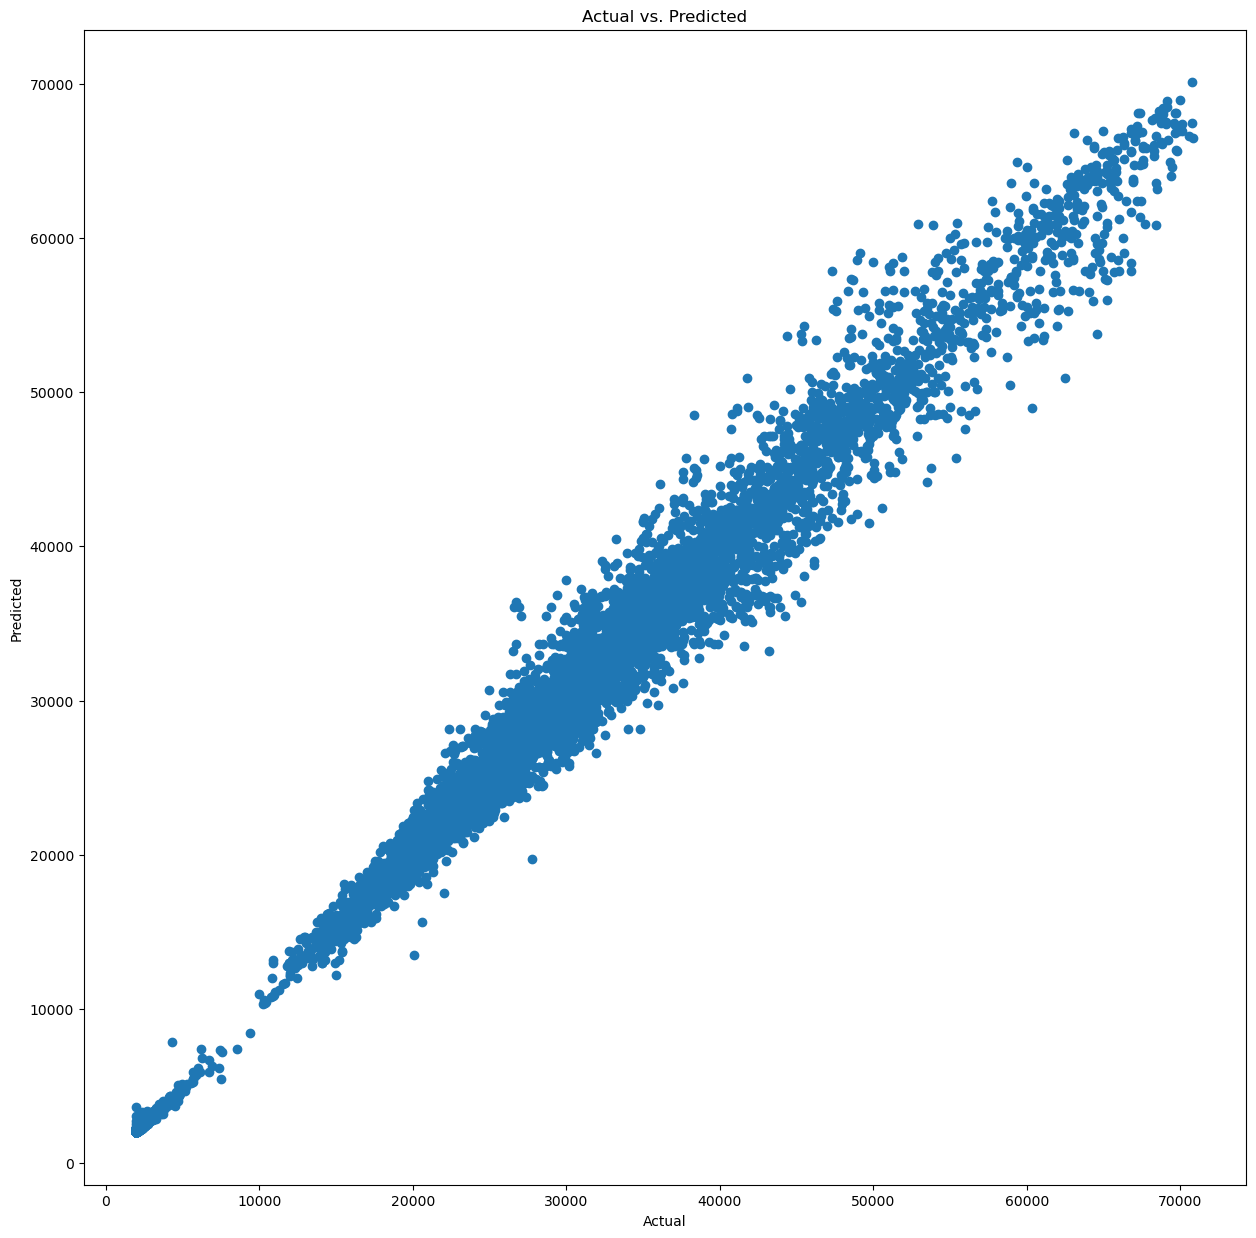

In [90]:
plt.figure(figsize=(15,15)) 
plt.scatter(y_train,rfr_t_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')

In [91]:
import pickle

In [92]:
pickle.dump(rfr,open('RandomForestModel.pkl','wb'))

In [93]:
rfr.predict(pd.DataFrame([[-5,15,1990,7,230,6,2,3,2,0,1,5,1,3916]], columns=['Make','Model','Year','Engine Fuel Type','Engine HP','Engine Cylinders','Transmission Type','Driven_Wheels','Number of Doors','Vehicle Size','Vehicle Style','highway MPG','city mpg','Popularity']))

C:\Users\ULAS\anaconda3\lib\site-packages\sklearn\base.py:402: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names



array([53209.56666667])